In [1]:
import torch
import numpy as np
import fastai
from fastai.vision.all import *
from tqdm import tqdm
from glob import glob
import os
import pandas as pd
import timm


os.environ["CUDA_VISIBLE_DEVICES"] = "1"

SEED = 85
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(SEED)

labels_train_val = pd.read_csv('../../../../..//data/train_val_list.txt')
labels_train_val.columns = ['Image_Index']
labels_test = pd.read_csv('../../../../..//data/test_list.txt')
labels_test.columns = ['Image_Index']

disease_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening',
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia', 'No Finding']
# NIH Dataset Labels CSV File 
labels_df = pd.read_csv('../../../../..//data/Data_Entry_2017.csv')
labels_df.columns = ['Image_Index', 'Finding_Labels', 'Follow_Up_#', 'Patient_ID',
                  'Patient_Age', 'Patient_Gender', 'View_Position',
                  'Original_Image_Width', 'Original_Image_Height',
                  'Original_Image_Pixel_Spacing_X',
                  'Original_Image_Pixel_Spacing_Y', 'dfd']
# One hot encoding
for diseases in tqdm(disease_labels): 
    labels_df[diseases] = labels_df['Finding_Labels'].map(lambda result: 1 if diseases in result else 0)

labels_df['Finding_Labels'] = labels_df['Finding_Labels'].apply(lambda s: [l for l in str(s).split('|')])

num_glob = glob('../../../../../data/images_all/*.png')
img_path = {os.path.basename(x): x for x in num_glob}

labels_df['Paths'] = labels_df['Image_Index'].map(img_path.get)
unique_patients = np.unique(labels_df['Patient_ID'])

train_val_df = labels_df[labels_df['Image_Index'].isin(labels_train_val['Image_Index'])]
test_df = labels_df[labels_df['Image_Index'].isin(labels_test['Image_Index'])]
test_df.reset_index(drop=True, inplace=True)

print('train_val size', train_val_df.shape[0])
print('test size', test_df.shape[0])

100%|██████████| 15/15 [00:00<00:00, 37.19it/s]


train_val size 86523
test size 25595


In [2]:

# item_transforms = [
#     Resize((224, 224)),
# ]

# batch_transforms = [
#     Flip(),
#     Rotate(),
#     Normalize.from_stats(*imagenet_stats),
# ]

# def splitter(df):
#     return L(range(len(df))), L([])  # 두 번째 리스트는 비워 두어 검증 세트가 없음을 의미

# def get_x(row):
#     return row['Paths']

# def get_y(row):
#     # labels = row[disease_labels].tolist()
#     labels = row[disease_labels].values.astype(int)

#     # if not isinstance(np.int64(labels[0]), np.int64):
#         # print('labels : ', labels, type(labels[0]))
#     return labels

# arch = 'coatnet_2_rw_224.sw_in12k_ft_in1k'

# # Test set evaluation
# test_dblock = DataBlock(
#     blocks=(ImageBlock, MultiCategoryBlock(encoded=True, vocab=disease_labels)),
#     get_x=get_x,
#     get_y=get_y,
#     item_tfms=item_transforms,
#     batch_tfms=batch_transforms,
#     splitter=splitter
# )

# test_dls = test_dblock.dataloaders(test_df, bs=64, shuffle=False, drop_last=False)

# learn = vision_learner(test_dls, arch, metrics=[accuracy_multi, F1ScoreMulti(), RocAucMulti()])
# learn.model = torch.nn.DataParallel(learn.model)

# learn.load('coatnet-70-10-20-split')

# # Get predictions and all_labels
# preds, all_labels = learn.get_preds(dl=test_dls[0])

# # Convert predictions to binary (thresholding)
# preds_binary = (preds > 0.5).int()

# # Initialize metrics
# accuracy_per_disease = []
# f1_per_disease = []
# roc_auc_per_disease = []

# # Calculate metrics for each disease
# for i, disease in enumerate(disease_labels):
#     accuracy = accuracy_multi(preds[:, i], all_labels[:, i])
#     f1 = F1ScoreMulti(average='macro')(preds_binary[:, i], all_labels[:, i])
#     roc_auc = RocAucMulti()(preds[:, i], all_labels[:, i])
    
#     accuracy_per_disease.append(accuracy)
#     f1_per_disease.append(f1)
#     roc_auc_per_disease.append(roc_auc)
    
#     print(f'{disease}:')
#     print(f'  Accuracy: {accuracy:.4f}')
#     print(f'  F1 Score: {f1:.4f}')
#     print(f'  ROC AUC: {roc_auc:.4f}')
#     print()

# # Optionally, convert results to DataFrame for better visualization
# results_df = pd.DataFrame({
#     'Disease': disease_labels,
#     'Accuracy': accuracy_per_disease,
#     'F1 Score': f1_per_disease,
#     'ROC AUC': roc_auc_per_disease
# })

# print(results_df)

## XGB

In [3]:
# import os
# import random
# import numpy as np
# import pandas as pd
# import torch
# from tqdm import tqdm
# from glob import glob
# from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# import xgboost as xgb
# from torchvision import models, transforms
# from PIL import Image
# from datetime import datetime
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import pickle
# from sklearn.multiclass import OneVsRestClassifier

# from warnings import filterwarnings
# filterwarnings('ignore')

In [4]:
# # 피클 파일에서 데이터 로드
# with open('train_val_features.pkl', 'rb') as f:
#     train_val_data = pickle.load(f)

# with open('test_features.pkl', 'rb') as f:
#     test_data = pickle.load(f)

In [5]:
# image_path = test_dls.items['Paths']
# test_data2 = {'paths':[], 'features':[]}
# for i, (p,f) in enumerate(zip(test_data['paths'], test_data['features'])):
#     if p in image_path.values:
#         test_data2['paths'].append(p)
#         test_data2['features'].append(f)
        
# test_data = test_data2
# test_df = test_df[test_df['Paths'].isin(test_data2['paths'])]

In [6]:
# # # 특징과 레이블 분리
# X_train = np.stack(train_val_data['features'])
# y_train = train_val_df[disease_labels].values

# X_test = np.stack(test_data['features'])
# y_test = test_df[disease_labels].values

# num_classes = 15

# # XGBoost 모델 설정
# xgb_model = xgb.XGBClassifier(
#     objective='multi:softprob',
#     eval_metric='mlogloss',
#     num_class=num_classes,
#     use_label_encoder=False,
#     tree_method='gpu_hist',  # GPU를 사용하도록 설정
#     gpu_id=0  # 특정 GPU를 지정
# )

# # tqdm 콜백 클래스 정의
# class TqdmCallback(xgb.callback.TrainingCallback):
#     def __init__(self, total, desc):
#         self.total = total
#         self.pbar = tqdm(total=total, desc=desc)

#     def after_iteration(self, model, epoch, evals_log):
#         self.pbar.update(1)
#         if epoch == self.total - 1:
#             self.pbar.close()
#         return False

# # OneVsRestClassifier로 멀티레이블 분류기 설정
# epochs = 20
# multilabel_model = OneVsRestClassifier(xgb_model)

# columns = [	"Time",
# 			"Accuracy",
# 			"F1_macro",
# 			"Roc_Auc_macro"]

In [7]:
# # 모델 학습을 위한 맞춤 fit 함수 정의
# def custom_fit(model, X_train, y_train, epochs):
#     print("Model Fit Start")

#     for i in range(y_train.shape[1]):
#         print(f"Training for label {i}")
#         model.estimator.fit(
#             X_train, 
#             y_train[:, i], 
#             eval_set=[(X_train, y_train[:, i]), (X_test, y_test[:, i])],
#             verbose=False, 
#             callbacks=[TqdmCallback(epochs, desc=f'Training label {i}')]
#         )

# # 모델 학습
# custom_fit(multilabel_model, X_train, y_train, epochs)

In [8]:
# # 예측
# y_pred = multilabel_model.estimator.predict(X_test)
# y_pred_proba = multilabel_model.estimator.predict_proba(X_test)  # AUC-ROC 계산을 위해 필요

# # 정확도 및 F1 스코어 계산
# accuracy = accuracy_score(y_test, y_pred)
# f1_micro = f1_score(y_test, y_pred, average='micro')
# f1_macro = f1_score(y_test, y_pred, average='macro')

# # AUC-ROC 스코어 계산
# roc_auc_micro = roc_auc_score(y_test, y_pred_proba, average='micro')
# roc_auc_macro = roc_auc_score(y_test, y_pred_proba, average='macro')

# print(f"Test Accuracy: {accuracy}")
# # print(f"Test F1 Score (Micro): {f1_micro}")   # 라벨에 상관없이 전체적인 성능 평가 (==accuracy와 동일)
# print(f"Test F1 Score (Macro): {f1_macro}")     # 모든 라벨이 유사한 중요도를 가져 단순 라벨들의 f1_score의 산술평균
# # print(f"Test ROC AUC Score (Micro): {roc_auc_micro}") 
# print(f"Test ROC AUC Score (Macro): {roc_auc_macro}")

# # 각 레이블별 평가 결과 출력
# for idx in range(y_test.shape[1]):
#     accuracy_label = accuracy_score(y_test[:, idx], y_pred[:, idx])
#     f1_label = f1_score(y_test[:, idx], y_pred[:, idx])
#     roc_auc_label = roc_auc_score(y_test[:, idx], y_pred_proba[:, idx])
#     print(f"Class {idx} - Accuracy: {accuracy_label}, F1 Score: {f1_label}, ROC AUC Score: {roc_auc_label}")


## 앙상블 결과

In [9]:
# # Define weights
# weight_fastai = 0.7  # You can adjust these weights based on model performance
# weight_xgboost = 0.3
# threshold=0.5

# # Ensure the predictions are in the same format
# preds_xgboost = np.array(y_pred_proba)

# # Weighted ensemble predictions
# all_outputs = weight_fastai * preds + weight_xgboost * preds_xgboost
# binary_outputs = (all_outputs > threshold).numpy().astype(int)

In [10]:
# import pickle

# with open('./pkl_data/all_labels.pkl', 'wb') as file:
#     pickle.dump(all_labels, file)

# with open('./pkl_data/all_outputs.pkl', 'wb') as file:
#     pickle.dump(all_outputs, file)
    
# with open('./pkl_data/binary_outputs.pkl', 'wb') as file:
#     pickle.dump(binary_outputs, file)

In [11]:
import pickle

# Pickle 파일에서 numpy 배열 불러오기
with open('./pkl_data/all_labels.pkl', 'rb') as file:
    all_labels = pickle.load(file)
    
with open('./pkl_data/all_outputs.pkl', 'rb') as file:
    all_outputs = pickle.load(file)
    
with open('./pkl_data/binary_outputs.pkl', 'rb') as file:
    binary_outputs = pickle.load(file)


In [12]:
# one error check
value_dict = {i:0 for i in disease_labels}
for b in all_outputs:
    value_dict[disease_labels[list(b).index(max(b))]] += 1

value_dict

{'Atelectasis': 3369,
 'Consolidation': 1873,
 'Infiltration': 3711,
 'Pneumothorax': 1008,
 'Edema': 258,
 'Emphysema': 624,
 'Fibrosis': 76,
 'Effusion': 2460,
 'Pneumonia': 0,
 'Pleural_Thickening': 389,
 'Cardiomegaly': 434,
 'Nodule': 745,
 'Mass': 869,
 'Hernia': 20,
 'No Finding': 9759}

In [13]:
# predict_all_output
threshold=0.5
binary_outputs = (all_outputs > threshold).numpy().astype(int)
value_dict = {i:0 for i in disease_labels}
for output in binary_outputs:
    idx = np.where(output == 1)[0]
    for i in idx:
        value_dict[disease_labels[i]] += 1

value_dict

{'Atelectasis': 2296,
 'Consolidation': 908,
 'Infiltration': 2379,
 'Pneumothorax': 895,
 'Edema': 164,
 'Emphysema': 596,
 'Fibrosis': 28,
 'Effusion': 2275,
 'Pneumonia': 2,
 'Pleural_Thickening': 201,
 'Cardiomegaly': 368,
 'Nodule': 448,
 'Mass': 763,
 'Hernia': 17,
 'No Finding': 7633}

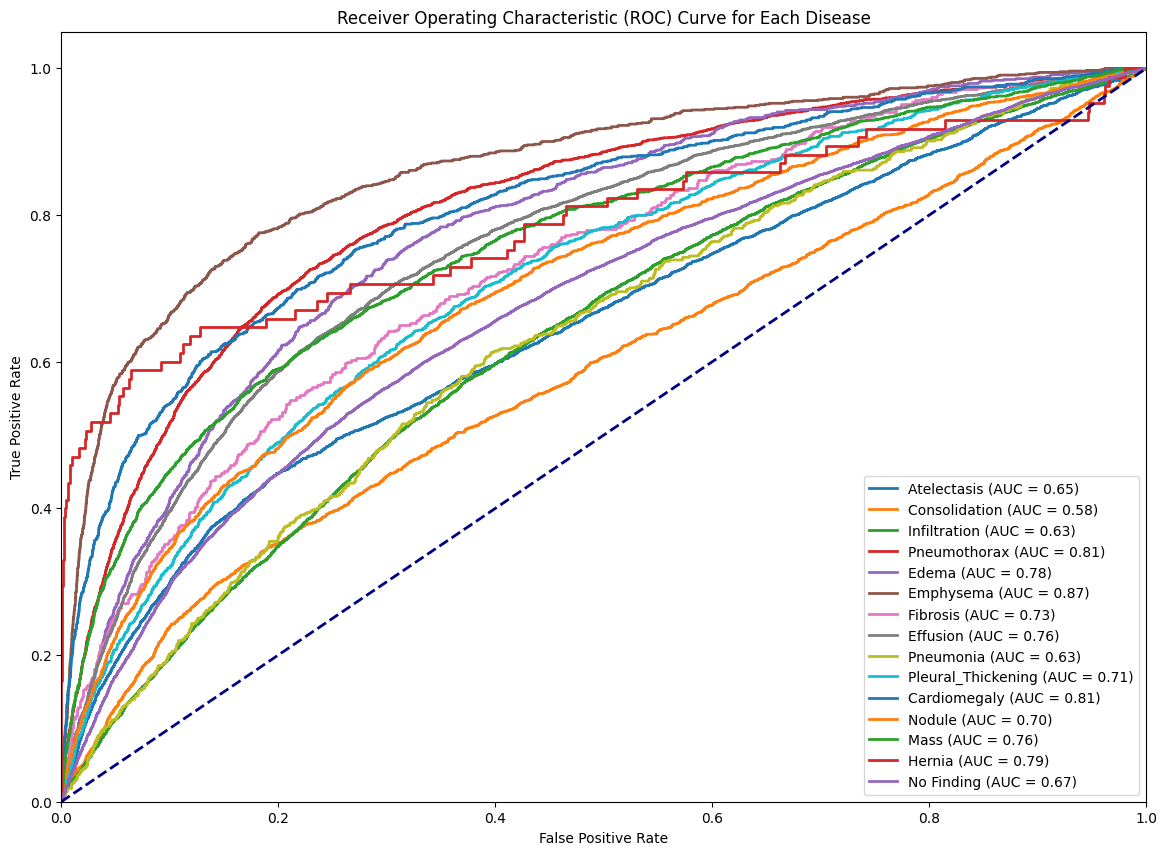

Atelectasis - ROC AUC Score: 0.6469
Consolidation - ROC AUC Score: 0.5848
Infiltration - ROC AUC Score: 0.6311
Pneumothorax - ROC AUC Score: 0.8127
Edema - ROC AUC Score: 0.7812
Emphysema - ROC AUC Score: 0.8654
Fibrosis - ROC AUC Score: 0.7289
Effusion - ROC AUC Score: 0.7588
Pneumonia - ROC AUC Score: 0.6319
Pleural_Thickening - ROC AUC Score: 0.7120
Cardiomegaly - ROC AUC Score: 0.8111
Nodule - ROC AUC Score: 0.7042
Mass - ROC AUC Score: 0.7593
Hernia - ROC AUC Score: 0.7863
No Finding - ROC AUC Score: 0.6740
Overall Accuracy: 0.7973


In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Plot ROC curve for each class
plt.figure(figsize=(14, 10))
for i, disease in enumerate(disease_labels):
    fpr, tpr, _ = roc_curve(all_labels[:, i].cpu(), all_outputs[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{disease} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Disease')
plt.legend(loc='lower right')
plt.savefig("ROC Curve for Each Disease")
plt.show()

# Print ROC AUC scores for each class
for i, disease in enumerate(disease_labels):
    roc_auc_label = roc_auc_score(all_labels[:, i].cpu(), all_outputs[:, i], average="macro")
    print(f'{disease} - ROC AUC Score: {roc_auc_label:.4f}')
    
# Calculate overall accuracy
overall_accuracy = roc_auc_score(all_labels.cpu().reshape(-1), all_outputs.reshape(-1), average="micro")
print(f'Overall Accuracy: {overall_accuracy:.4f}')    


In [15]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming 'all_labels' and 'all_outputs' are already defined and have compatible shapes

# Convert ensemble probabilities to class predictions using a threshold (e.g., 0.5)
threshold = 0.5
ensemble_class_preds = (all_outputs > threshold).to(int)

# Calculate accuracy for each class
print("Accuracy for each class:")
for i, disease in enumerate(disease_labels):
    accuracy_class = accuracy_score(all_labels[:, i].cpu(), ensemble_class_preds[:, i])
    print(f'{disease} - Accuracy: {accuracy_class:.4f}')

# Calculate overall accuracy
overall_accuracy = accuracy_score(all_labels.cpu().reshape(-1), ensemble_class_preds.reshape(-1))
print(f'Overall Accuracy: {overall_accuracy:.4f}')

print("all_labels.shape : ", all_labels.shape)

# Calculate overall accuracy
overall_accuracy_bf_reshape = accuracy_score(all_labels.cpu(), ensemble_class_preds)
print(f'Overall Accuracy before reshape: {overall_accuracy_bf_reshape:.4f}')

Accuracy for each class:
Atelectasis - Accuracy: 0.8419
Consolidation - Accuracy: 0.9053
Infiltration - Accuracy: 0.7417
Pneumothorax - Accuracy: 0.8977
Edema - Accuracy: 0.9610
Emphysema - Accuracy: 0.9568
Fibrosis - Accuracy: 0.9825
Effusion - Accuracy: 0.8216
Pneumonia - Accuracy: 0.9783
Pleural_Thickening - Accuracy: 0.9508
Cardiomegaly - Accuracy: 0.9576
Nodule - Accuracy: 0.9298
Mass - Accuracy: 0.9265
Hernia - Accuracy: 0.9970
No Finding - Accuracy: 0.6639
Overall Accuracy: 0.9008
all_labels.shape :  torch.Size([25595, 15])
Overall Accuracy before reshape: 0.2244


In [16]:
import numpy as np
from sklearn.metrics import f1_score

# Assuming 'all_labels' and 'all_outputs' are already defined and have compatible shapes

# Convert ensemble probabilities to class predictions using a threshold (e.g., 0.5)
threshold = 0.5
ensemble_class_f1_preds = (all_outputs > threshold).to(int)

# Calculate accuracy for each class
print("f1 for each class:")
for i, disease in enumerate(disease_labels):
    accuracy_class = f1_score(all_labels[:, i].cpu(), ensemble_class_f1_preds[:, i])
    print(f'{disease} - f1: {accuracy_class:.4f}')

# Calculate overall accuracy
overall_accuracy = f1_score(all_labels.cpu().reshape(-1), ensemble_class_f1_preds.reshape(-1))
print(f'Overall f1: {overall_accuracy:.4f}')


f1 for each class:
Atelectasis - f1: 0.2741
Consolidation - f1: 0.1094
Infiltration - f1: 0.2214
Pneumothorax - f1: 0.2646
Edema - f1: 0.0826
Emphysema - f1: 0.3458
Fibrosis - f1: 0.0302
Effusion - f1: 0.3416
Pneumonia - f1: 0.0036
Pleural_Thickening - f1: 0.0625
Cardiomegaly - f1: 0.2450
Nodule - f1: 0.1323
Mass - f1: 0.2509
Hernia - f1: 0.2353
No Finding - f1: 0.5083
Overall f1: 0.3205


# 각 loss 계산 결과

In [17]:
# Cell 1: Import necessary libraries
import numpy as np
import torch
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, coverage_error, label_ranking_loss, average_precision_score

# Assuming 'all_labels' and 'all_outputs' are already defined and have compatible shapes
# Convert ensemble probabilities to class predictions using a threshold (e.g., 0.5)
threshold = 0.5
ensemble_class_preds = (all_outputs > threshold).to(int)

# Define the disease labels
disease_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening',
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia', 'No Finding']

# Calculate accuracy for each class
print("Accuracy for each class:")
for i, disease in enumerate(disease_labels):
    accuracy_class = accuracy_score(all_labels[:, i].cpu(), ensemble_class_preds[:, i])
    print(f'{disease} - Accuracy: {accuracy_class:.4f}')

# Calculate overall accuracy
overall_accuracy = accuracy_score(all_labels.cpu().reshape(-1), ensemble_class_preds.reshape(-1))
print(f'Overall Accuracy: {overall_accuracy:.4f}')

print("all_labels.shape : ", all_labels.shape)

# Calculate overall accuracy before reshape
overall_accuracy_bf_reshape = accuracy_score(all_labels.cpu(), ensemble_class_preds)
print(f'Overall Accuracy before reshape: {overall_accuracy_bf_reshape:.4f}')


Accuracy for each class:
Atelectasis - Accuracy: 0.8419
Consolidation - Accuracy: 0.9053
Infiltration - Accuracy: 0.7417
Pneumothorax - Accuracy: 0.8977
Edema - Accuracy: 0.9610
Emphysema - Accuracy: 0.9568
Fibrosis - Accuracy: 0.9825
Effusion - Accuracy: 0.8216
Pneumonia - Accuracy: 0.9783
Pleural_Thickening - Accuracy: 0.9508
Cardiomegaly - Accuracy: 0.9576
Nodule - Accuracy: 0.9298
Mass - Accuracy: 0.9265
Hernia - Accuracy: 0.9970
No Finding - Accuracy: 0.6639
Overall Accuracy: 0.9008
all_labels.shape :  torch.Size([25595, 15])
Overall Accuracy before reshape: 0.2244


In [18]:
# Cell 2: Calculate Hamming Loss
hamming_loss_value = hamming_loss(all_labels.cpu(), ensemble_class_preds)
print(f'Hamming Loss: {hamming_loss_value:.4f}')


Hamming Loss: 0.0992


In [19]:
# Cell 3: Calculate Ranking Loss
ranking_loss_value = label_ranking_loss(all_labels.cpu(), all_outputs)
print(f'Ranking Loss: {ranking_loss_value:.4f}')


Ranking Loss: 0.1918


In [20]:
# help(ranking_loss_value)
ranking_loss_value.data

In [21]:
# Cell 4: Calculate Multilabel Accuracy
accuracy_each_class = []

# Calculate accuracy for each class
for i, disease in enumerate(disease_labels):
    accuracy_each_class.append(accuracy_score(all_labels[:, i].cpu(), ensemble_class_preds[:, i]))

multilabel_accuracy = np.average(accuracy_each_class)
print(f'Multilabel Accuracy: {multilabel_accuracy:.4f}')


Multilabel Accuracy: 0.9008


In [22]:
# Cell 5: Calculate Multilabel Coverage
multilabel_coverage = coverage_error(all_labels.cpu(), all_outputs)
print(f'Multilabel Coverage: {multilabel_coverage:.4f}')


Multilabel Coverage: 4.5283


In [23]:
# Cell 6: Calculate One Error
def one_error(y_true, y_pred):
    n_samples = y_true.shape[0]
    one_error_count = 0
    for i in range(n_samples):
        top_pred_idx = np.argmax(y_pred[i])
        if y_true[i, top_pred_idx] == 0:
            one_error_count += 1
    return one_error_count / n_samples

one_error_value = one_error(all_labels.cpu().numpy(), all_outputs.cpu().numpy())
print(f'One Error: {one_error_value:.4f}')

One Error: 0.5754


In [24]:
# Cell 7: Calculate Subset Accuracy
subset_accuracy = accuracy_score(all_labels.cpu(), ensemble_class_preds, normalize=True)
print(f'Subset Accuracy: {subset_accuracy:.4f}')


Subset Accuracy: 0.2244


In [25]:
# Cell 8: Calculate Macro F1 Score
macro_f1_score = f1_score(all_labels.cpu(), ensemble_class_preds, average='macro')
print(f'Macro F1 Score: {macro_f1_score:.4f}')


Macro F1 Score: 0.2072


In [26]:
# Cell 9: Calculate Micro F1 Score
micro_f1_score = f1_score(all_labels.cpu(), ensemble_class_preds, average='micro')
print(f'Micro F1 Score: {micro_f1_score:.4f}')


Micro F1 Score: 0.3205


In [27]:
# # Record each class accuracy
# columns = disease_labels

# for i,v in enumerate(accuracy_each_class):
#     accuracy_each_class[i] = f"{v:.4f}"

# result = pd.DataFrame([accuracy_each_class], columns=columns)
# result.to_csv("each_class_accuracy.csv", index=False)

In [28]:
# # Record over all loss
# columns = [
#     "Hamming Loss",
#     "Ranking Loss",
#     "Multilabel Accuracy",
#     "Multilabel Coverage",
#     "One Error",
#     "Subset Accuracy",
#     "Macro F1 score",
#     "Micro F1 score"
# ]

# over_score=[]

# over_score.append(f"{hamming_loss_value:.4f}")
# over_score.append(f"{ranking_loss_value:.4f}")
# over_score.append(f"{multilabel_accuracy:.4f}")
# over_score.append(f"{multilabel_coverage:.4f}")
# over_score.append(f"{one_error_value:.4f}")
# over_score.append(f"{subset_accuracy:.4f}")
# over_score.append(f"{macro_f1_score:.4f}")
# over_score.append(f"{micro_f1_score:.4f}")

# result = pd.DataFrame([over_score], columns=columns)
# result.to_csv("overall_score.csv", index=False)

In [29]:
# import calculate_metric as cm

# res_df = cm.results_low_score_image(test_df, predicts=all_outputs, all_labels=all_labels, metric='hamming_loss')
# print("hamming loss")
# display(res_df)

# res_df = cm.results_low_score_image(test_df, predicts=all_outputs, all_labels=all_labels, metric='ranking_loss')
# print("ranking_loss loss")
# display(res_df)

# res_df = cm.results_low_score_image(test_df, predicts=all_outputs, all_labels=all_labels, metric='multilabel_coverage')
# print('multilabel_coverage')
# display(res_df)

# res_df = cm.results_low_score_image(test_df, predicts=all_outputs, all_labels=all_labels, metric='subset_accuracy')
# print('subset_accuracy')
# display(res_df)

# res_df = cm.results_low_score_image(test_df, predicts=all_outputs, all_labels=all_labels, metric='macro_f1_score')
# print("macro_f1_score")
# display(res_df)

# res_df = cm.results_low_score_image(test_df, predicts=all_outputs, all_labels=all_labels, metric='micro_f1_score')
# print("miro_f1_score")
# display(res_df)




In [43]:
import os
import sys

notebook_path = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_path, '..', '..', '..', '..'))

utils_path = os.path.abspath(os.path.join(project_root, 'utils'))
sys.path.append(utils_path)

import pandas as pd
import calculate_metric as cm

if not os.path.exists('results'):
    os.makedirs('results')

metrics = ['hamming_loss', 'ranking_loss', 'multilabel_coverage', 'one_error', 'subset_accuracy', 'macro_f1_score', 'micro_f1_score']
excel_writer = pd.ExcelWriter('results/scores_syn.xlsx', engine='xlsxwriter')

df = test_df.loc[:, ['Image_Index', 'Finding_Labels', 'Paths']]

for metric in metrics:
    res_df = cm.results_low_score_image(df, predicts=all_outputs, targets=all_labels, metric=metric)
    print(metric.replace('_', ' '))
    res_df.to_excel(excel_writer, sheet_name=metric.replace('_', ' '), index=False)

excel_writer.close()
print('Results saved to results/scores_syn.xlsx')

hamming loss
ranking loss
multilabel coverage
one error
subset accuracy
macro f1 score
micro f1 score
Results saved to results/scores_syn.xlsx


In [48]:
cm.Subset_Accuracy(binary_outputs, all_labels)

Subset Accuracy: 0.2244


'0.2244'